In [84]:
import matplotlib.pyplot as plt
import csv
import os
import re
import numpy as np
from scipy.stats import pearsonr
from pandas import ewma
%matplotlib inline

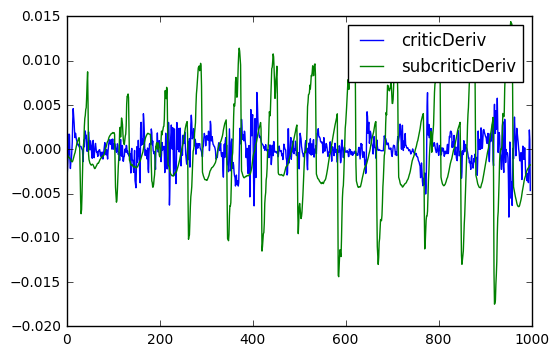

In [95]:
def nameToIndex(name, header):
    return header.index(name)

def readExperiment(filename):
    with open(filename, 'r') as csvfile:
        reader = csv.reader(csvfile)
        rows = []
        for row in reader:
            rows.append(row)
        Critic_Q_mean_index = nameToIndex('Critic_Q_mean',rows[0])
        Critic_Q_mean_values = []
        subcriticIndex = nameToIndex('subcritic_layer0/subcritic_n0/Qtarget/Identity_2:0_mean', rows[0])
        subcritic_mean_values = []
        for row in rows[1:]:
            Critic_Q_mean_values.append(float(row[Critic_Q_mean_index]))
            subcritic_mean_values.append(float(row[subcriticIndex]))
        criticDeriv = np.gradient(Critic_Q_mean_values)
        subcriticDeriv = np.gradient(subcritic_mean_values)
        plt.plot(criticDeriv, label="criticDeriv")
        plt.plot(subcriticDeriv, label="subcriticDeriv")
        plt.legend()
#         deriv = np.gradient(Critic_Q_mean_values)
#         smoothedDeriv = ewma(deriv, com=100)
#         plt.plot(Critic_Q_mean_values, label=int(re.findall(r'\d+', filename)[0]))
#         plt.plot(deriv, label='deriv ' + re.findall(r'\d+', filename)[0])
#         plt.plot(smoothedDeriv, label='smoothedDeriv ' + re.findall(r'\d+', filename)[0])
            
        plt.legend()

def loadExperimentsOutput(outputDir='../output',episodesToAnalyze=[]):
    files = [outputDir + '/' + filename for filename in sorted(os.listdir(outputDir), key=lambda filename: int(re.findall(r'\d+', filename)[0]))]
    filteredFiles = files
    if episodesToAnalyze:
        filteredFiles = filter(lambda filename: int(re.findall(r'\d+', filename)[0]) in episodesToAnalyze, files)
    for file in filteredFiles:
        readExperiment(file)
loadExperimentsOutput(episodesToAnalyze=[10])